<a href="https://colab.research.google.com/github/musama00/Product-Demand-Prediction-Using-Machine-Learning-FYP-/blob/main/Data_Analysis_(Product_Demand_Prediction_FYP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
train = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
features = pd.read_csv('/content/features.csv')
train = train.merge(stores, on='Store', how = 'left')
train = train.merge(features, on= ['Store', 'Date'], how='left')
# Selecting the required columns from the train DataFrame
selected_columns = ['Store', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Renaming 'IsHoliday_x' to 'Holiday_Flag' to match the required column names
data = train[selected_columns].rename(columns={'IsHoliday_x': 'Holiday_Flag'})

data['Holiday_Flag'] = data['Holiday_Flag'].astype(int)


# Display the modified DataFrame
# data.head()


In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106


In [ ]:
data["Weekly_Sales"].min()

-4988.94

In [ ]:
data["Weekly_Sales"].max()

693099.36

In [ ]:
data["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
data["Store"].nunique()

45

In [ ]:
data["Store"].value_counts()

,count
Store,
13,10474
10,10315
4,10272
1,10244
2,10238
24,10228
27,10225
34,10224
20,10214


In [ ]:
data["Temperature"].nunique()

3528

In [ ]:
data["Unemployment"].nunique()

349

In [ ]:
data["CPI"].nunique()

2145

In [ ]:
data["Holiday_Flag"].value_counts()

,count
Holiday_Flag,
0,391909
1,29661


In [ ]:
print(f"Data is from {data['Date'].iloc[0]}, to date {data['Date'].iloc[-1]}")

Data is from 2010-02-05 00:00:00, to date 2012-10-26 00:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

# Basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Weekly_Sales  421570 non-null  float64
 3   Holiday_Flag  421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 25.7+ MB
None


In [ ]:
data.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,15981.258123,0.070358,60.090059,3.361027,171.201947,7.960289
std,12.785297,22711.183519,0.255750,18.447931,0.458515,39.159276,1.863296
min,1.000000,-4988.940000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,2079.650000,0.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,7612.030000,0.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,20205.852500,0.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,693099.360000,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")


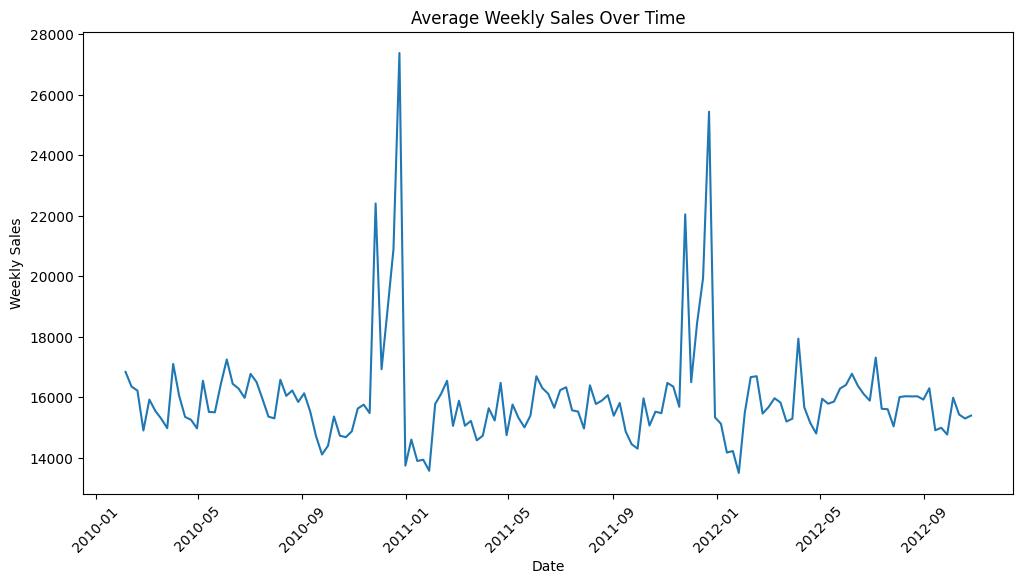

In [ ]:
# Visualization: Sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data, errorbar=None)
plt.title('Average Weekly Sales Over Time')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()



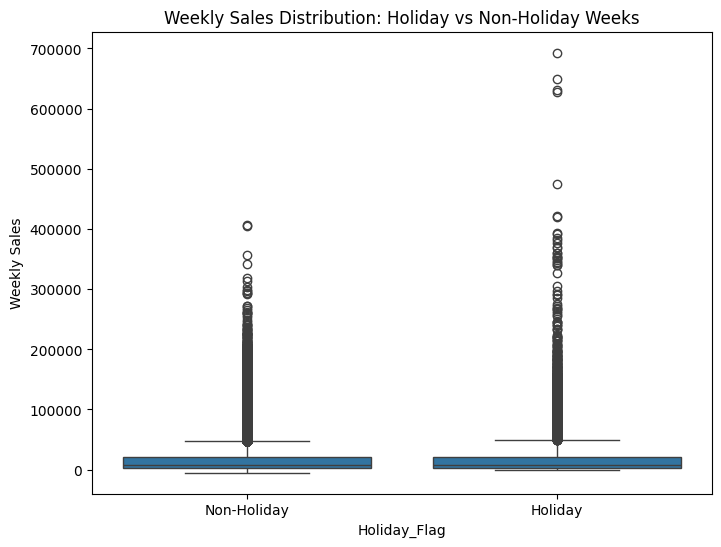

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Weekly Sales')
plt.show()

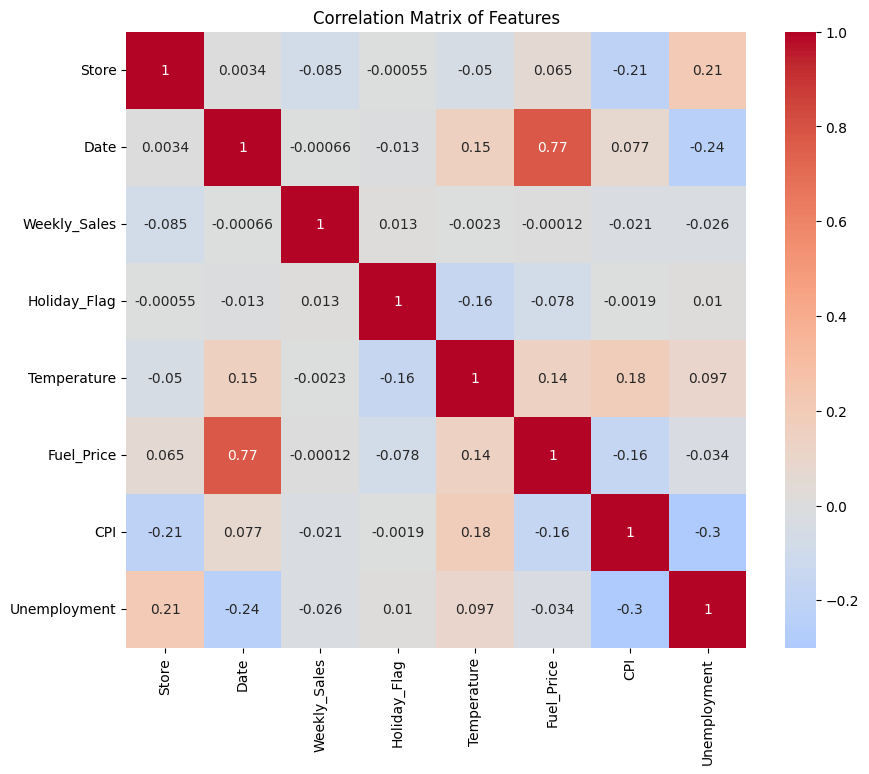

In [ ]:
# Calculate correlations
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

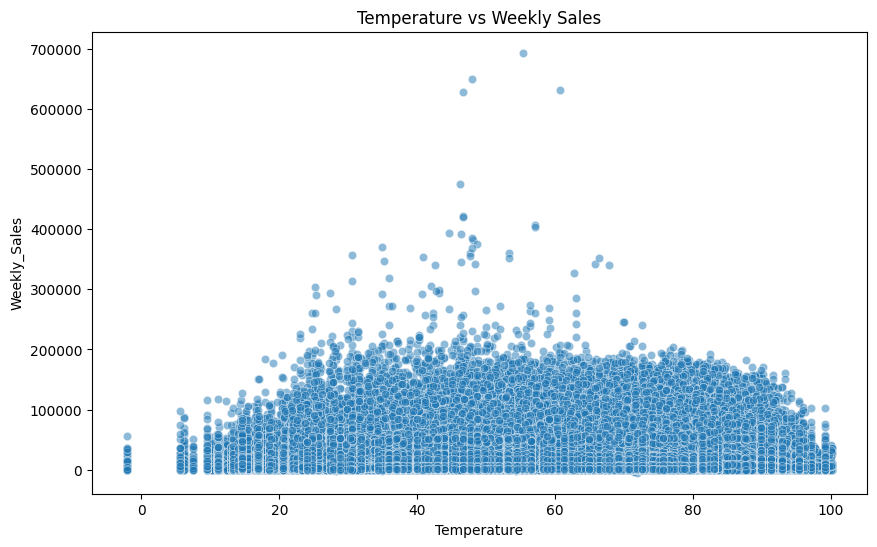

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.show()

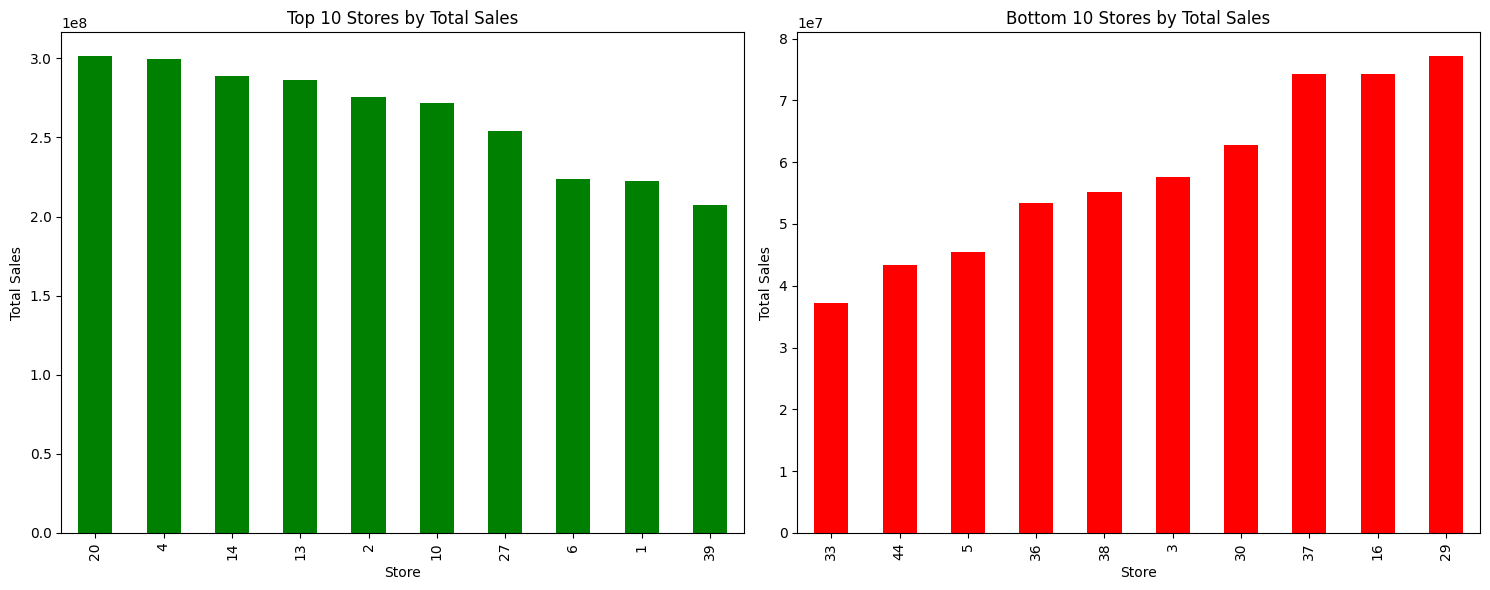

In [ ]:
# Store-wise analysis
def plot_store_analysis(data):
    # Top 10 stores by sales
    top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)



    # Bottom 10 stores by sales
    bottom_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values().head(10)

    plt.figure(figsize=(15, 6))

    # Top stores
    plt.subplot(1, 2, 1)
    top_stores.plot(kind='bar', color='green', title='Top 10 Stores by Total Sales')
    plt.ylabel('Total Sales')

    # Bottom stores
    plt.subplot(1, 2, 2)
    bottom_stores.plot(kind='bar', color='red', title='Bottom 10 Stores by Total Sales')
    plt.ylabel('Total Sales')

    plt.tight_layout()
    plt.show()

    return top_stores
top_stores = plot_store_analysis(data)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


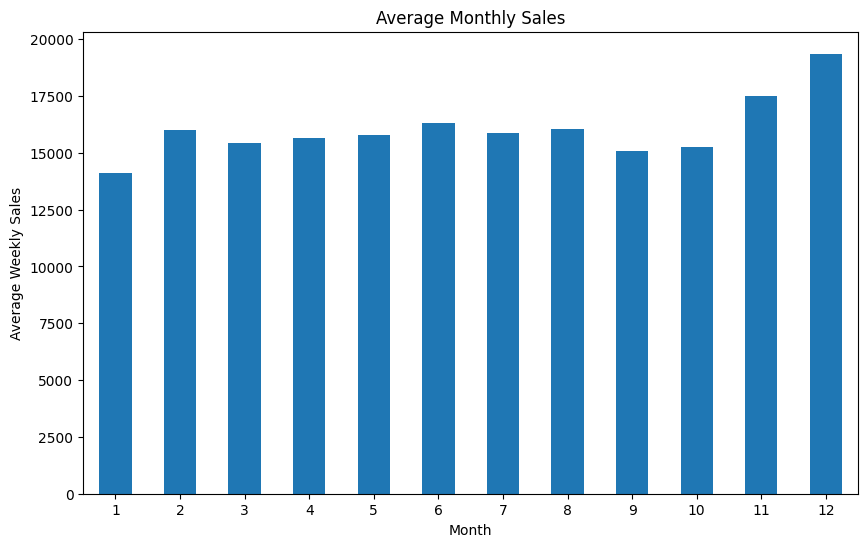

In [ ]:
# Extract month from date
data['Month'] = data['Date'].dt.month

# Plot monthly sales
plt.figure(figsize=(10, 6))
data.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

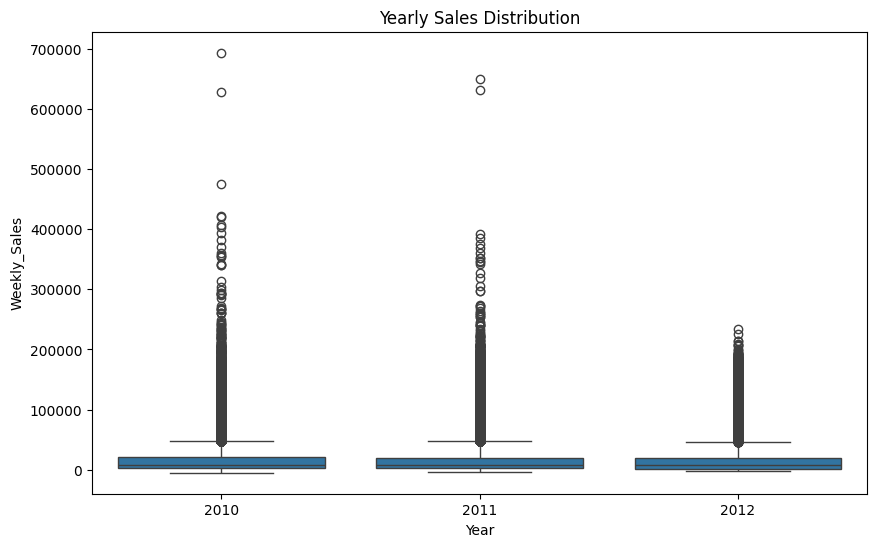

In [ ]:
data['Year'] = data['Date'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title('Yearly Sales Distribution')
plt.show()

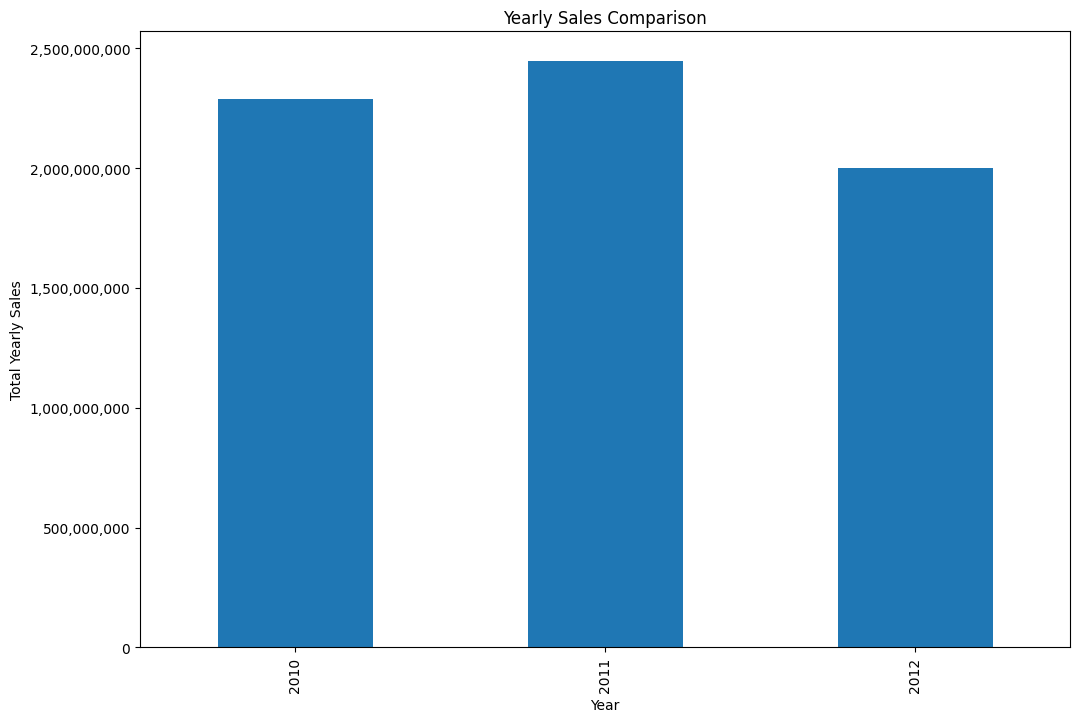

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is your DataFrame
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()

# Plot settings for large data
plt.figure(figsize=(12, 8))

# Yearly sales trend
ax = yearly_sales.plot(kind='bar', title='Yearly Sales Comparison')
plt.ylabel('Total Yearly Sales')

# Format y-axis to show exact values
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


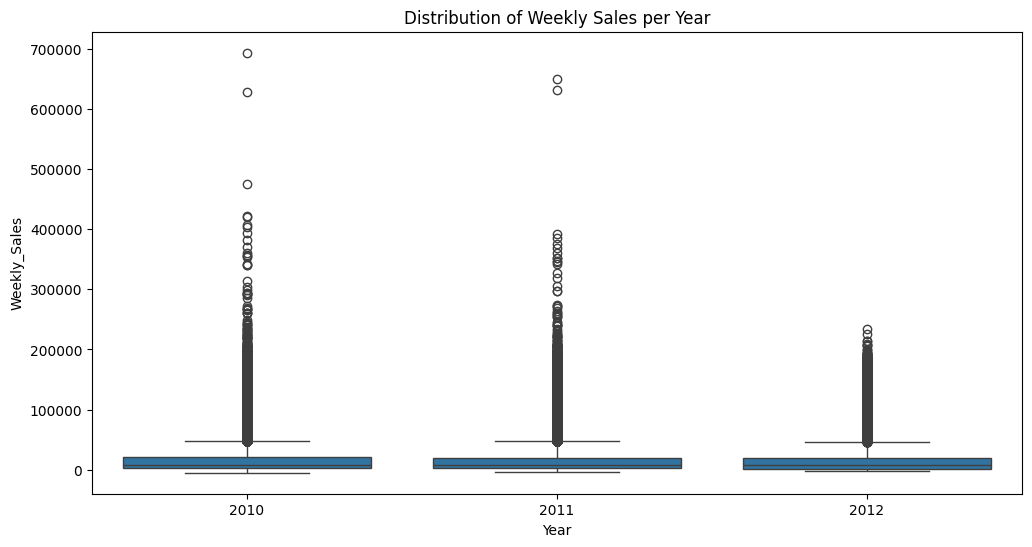

In [ ]:
# Visualization: Sales distribution per year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title("Distribution of Weekly Sales per Year")
plt.show()



In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Convert Date column to ordinal (if applicable)
# if 'Date' in data.columns:
#     data['Date'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)

# # Compute correlation only for numeric columns
# corr_matrix = data.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Heatmap")
# plt.show()


In [ ]:
data.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Store,1.000000,0.003362,-0.085195,-0.000548,-0.050097,0.065290,-0.211088,0.208552,0.001011,0.002997
Date,0.003362,1.000000,-0.000663,-0.013017,0.147064,0.771913,0.077001,-0.243370,0.146422,0.941467
Weekly_Sales,-0.085195,-0.000663,1.000000,0.012774,-0.002312,-0.000120,-0.020921,-0.025864,0.028409,-0.010111
Holiday_Flag,-0.000548,-0.013017,0.012774,1.000000,-0.155949,-0.078281,-0.001944,0.010460,0.123376,-0.056746
Temperature,-0.050097,0.147064,-0.002312,-0.155949,1.000000,0.143859,0.182112,0.096730,0.235983,0.065814
Fuel_Price,0.065290,0.771913,-0.000120,-0.078281,0.143859,1.000000,-0.164210,-0.033853,-0.040876,0.779633
CPI,-0.211088,0.077001,-0.020921,-0.001944,0.182112,-0.164210,1.000000,-0.299953,0.005282,0.074544
Unemployment,0.208552,-0.243370,-0.025864,0.010460,0.096730,-0.033853,-0.299953,1.000000,-0.012444,-0.237161
Month,0.001011,0.146422,0.028409,0.123376,0.235983,-0.040876,0.005282,-0.012444,1.000000,-0.194288
Year,0.002997,0.941467,-0.010111,-0.056746,0.065814,0.779633,0.074544,-0.237161,-0.194288,1.000000


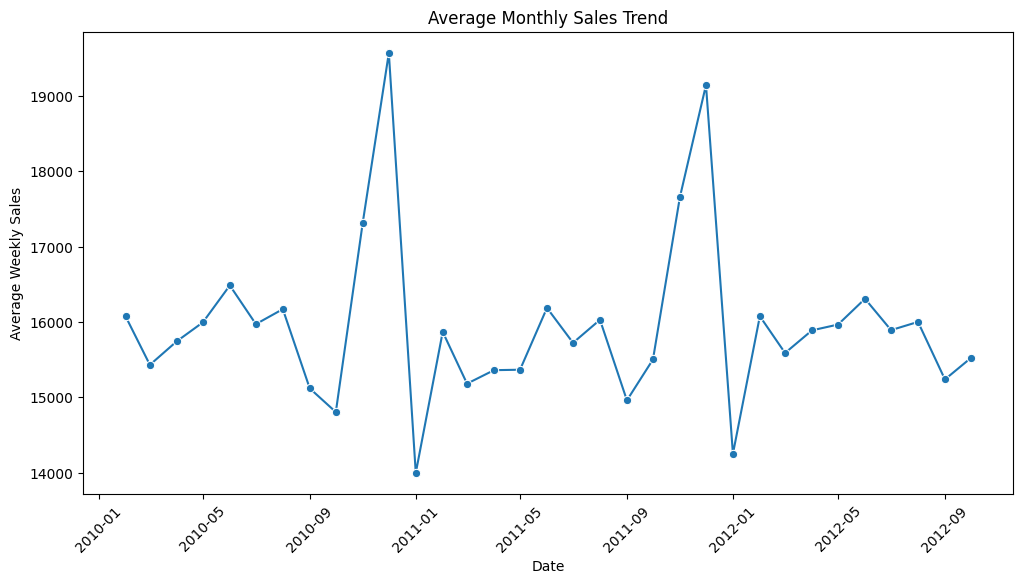

In [ ]:
# Visualization: Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
sns.lineplot(x='Date', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title("Average Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=45)
plt.show()



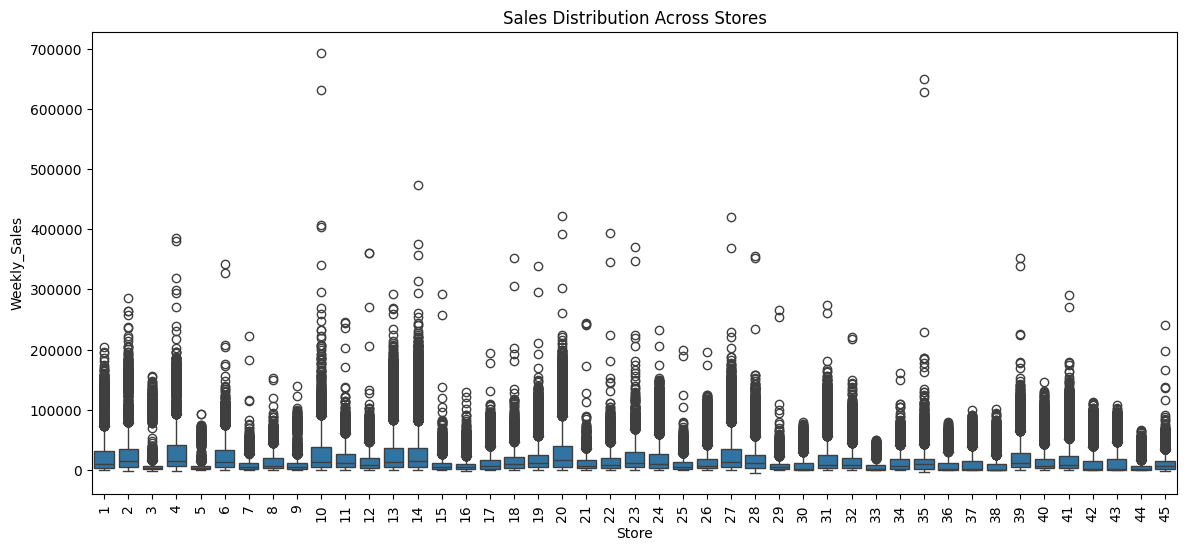

In [ ]:
# Visualization: Sales Distribution by Store
plt.figure(figsize=(14, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title("Sales Distribution Across Stores")
plt.xticks(rotation=90)
plt.show()



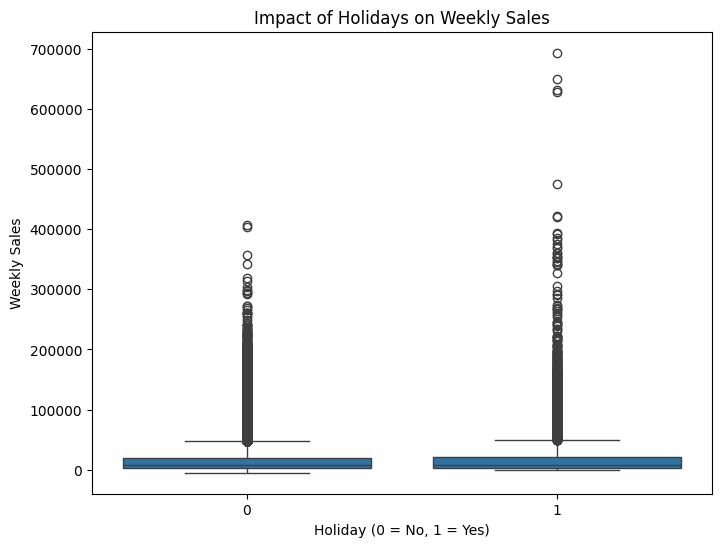

In [ ]:
# Visualization: Impact of Holidays on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title("Impact of Holidays on Weekly Sales")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()



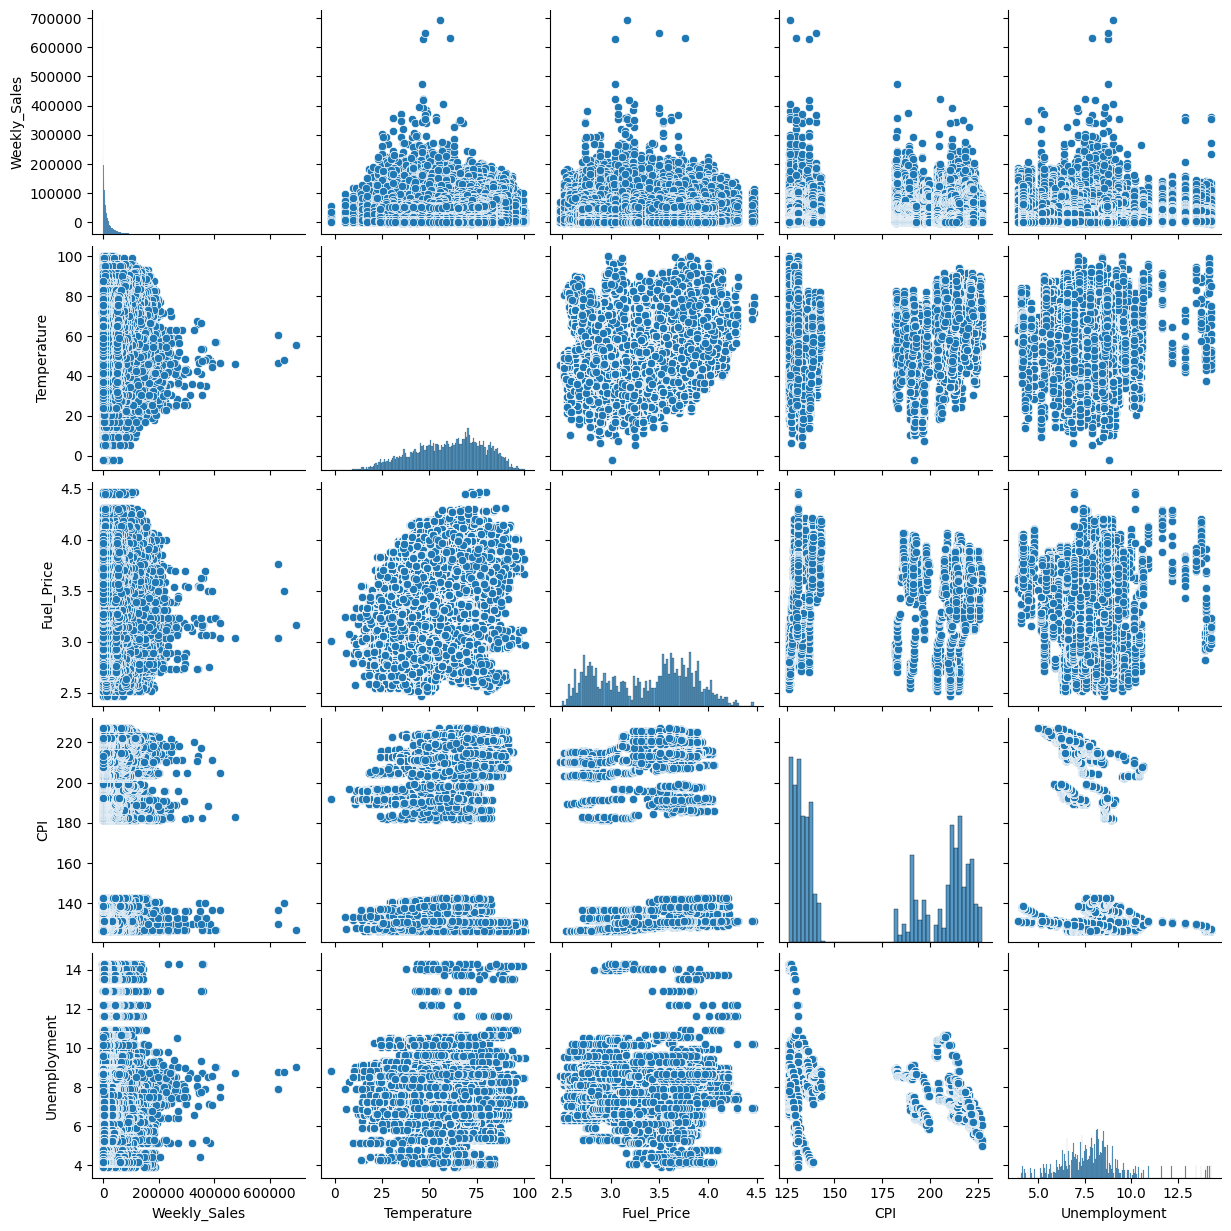

In [ ]:
# Pairplot to visualize relationships

sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


In [ ]:
#include_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
#for i in include_columns:
#plt.title(i)
#sns.boxplot(data[i])
#plt.show()